# Grad-CAM visualisation

In [1]:
%matplotlib notebook

import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns; sns.set()
from sklearn.metrics import classification_report, confusion_matrix

import sys
sys.path
sys.path.append("../../models/classification")

from models import ResNet, AlexNet
from dataset import Dataset

In [2]:
TRAIN_PATH = "../../../honours_project_data/main/train_high.txt"
VAL_PATH = "../../../honours_project_data/main/test_high.txt"
WEIGHTS_PATH = "../../../out/new_out/ResNet/ResNet_fusion_weights.h5"

# train_data = Dataset(TRAIN_PATH, res=(120, 160))
val_data = Dataset(VAL_PATH, res=(120, 160), register=True, batch_size=1)

In [3]:
model = ResNet("fusion", val_data.num_classes(), val_data.shape()).get_model()

model.load_weights(WEIGHTS_PATH)

In [4]:
y_pred = np.argmax(model.predict(val_data.get_all()), axis=1)

In [5]:
y_test = val_data.get_labels()

<IPython.core.display.Javascript object>


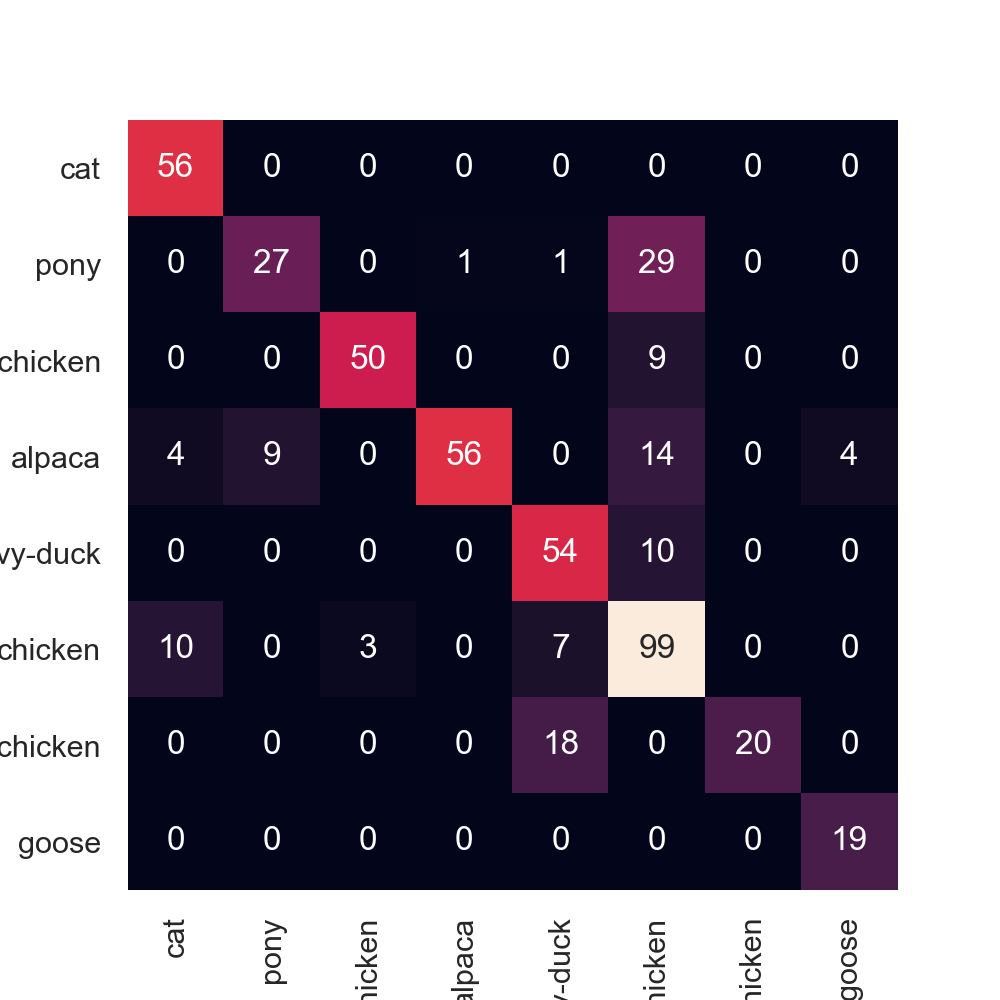

In [6]:
y_pred_named = [val_data.class_labels[x] for x in y_pred]
y_test_named = [val_data.class_labels[x] for x in y_test]
confusion = confusion_matrix(y_test_named, y_pred_named, labels=val_data.class_labels)

fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax = sns.heatmap(confusion, annot=True, xticklabels=val_data.class_labels, yticklabels=val_data.class_labels, square=True, cbar=False, fmt="d")
ax.set(xlabel='Predicted class', ylabel='Actual class')
fig.savefig("confusion.pdf", bbox_inches="tight")
plt.show()